This project is in partnership with the City of Gainesville. 

Every year the city conducts a Neighbor Survey, sending out a proportionate amount of surveys to different regions of the city. The purpose of these surveys is to elicit responses regarding the effectiveness of city services (e.g. trash collection, reporting problems, etc.), as well as how the citizens (aka neighbors) feel about the city of Gainesville (e.g. how safe they feel in the city, flow of traffic, community identity, etc).

The U.S. Census Bureau conducts their ongoing American Community Survey, which is used to determine how State and Federal funds are distributed throughout communities nationwide. Last year's data provides Gainesville specific findings. 

The goal of this project is analyze these findings from both datasets in order to extract patterns, commonalities, and anomalies. 

With that goal being quite open ended, a meeting with a city representative was conducted in order to inquire about possible priorities. The list provided is comprehensive, and 
would require more time than allotted this term. The top priorities were analyzing all questions with a five point response scale in which participants responded "Neutral", 
"Somewhat Important", or "Don't Know" to find overall trends and commonalities. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("City_of_Gainesville_2020_Neighbor_Survey_-_Raw_Data.csv") #drop ID? .drop(columns="ID", axis=1)
data.head()

,ID,Q1.1 As a Place to Live,Q1.2 As a Place to Work,Q1.3 As a Place to Raise Children,Q1.4 As a Place for Play and Leisure,Q1.5 As a Place to Visit,Q1.6 As a Place to Retire,Q1.7 As a City Moving in the Right Direction,Q1.8 As a City Committed to Green and Sustainable Practices,Q1.9 Overall Image or Reputation of City Governement,...,Q40[.13 Reported a crime to police,Q40.14 Reported a non-emergency service request on the myGNV app,"Q40.15 Stocked supplies, identified evacuation/shelter opportunities","Q40.16 Campaigned or advocated for an issue, cause, or candidate",Q40.17 Contacted Gainesville elected officials,Q40.18 Contacted the City of Gainesville,Zip,District,Block Lon,Block Lat
0,1,5,4,9,3,4,4,2,4,4,...,1,1,1,2,2,1,32608,4,-82339000,29626000
1,2,5,5,5,5,5,5,5,5,5,...,9,9,9,9,9,9,32609,1,-82323000,29691000
2,3,4,3,3,3,4,2,2,1,2,...,1,2,2,1,1,2,32653,2,-82379000,29716000
3,4,5,4,5,4,3,4,4,4,3,...,2,2,2,2,2,2,32601,1,-82326000,29638000
4,5,4,3,4,4,4,4,4,4,4,...,2,2,1,2,2,2,32605,3,-82389000,29666000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 224 entries, ID to Block Lat
dtypes: float64(55), int64(161), object(8)
memory usage: 1.8+ MB


In [4]:
data.columns

Index(['ID', 'Q1.1 As a Place to Live', 'Q1.2 As a Place to Work',
       'Q1.3 As a Place to Raise Children',
       'Q1.4 As a Place for Play and Leisure', 'Q1.5 As a Place to Visit',
       'Q1.6 As a Place to Retire',
       'Q1.7 As a City Moving in the Right Direction ',
       'Q1.8 As a City Committed to Green and Sustainable Practices',
       'Q1.9 Overall Image or Reputation of City Governement',
       ...
       'Q40[.13 Reported a crime to police',
       'Q40.14 Reported a non-emergency service request on the myGNV app',
       'Q40.15 Stocked supplies, identified evacuation/shelter opportunities',
       'Q40.16 Campaigned or advocated for an issue, cause, or candidate ',
       'Q40.17 Contacted Gainesville elected officials',
       'Q40.18 Contacted the City of Gainesville', 'Zip', 'District',
       'Block Lon', 'Block Lat'],
      dtype='object', length=224)

In [6]:
onefive_data = data.copy()
onefive_data = onefive_data.loc[:,"Q1.1 As a Place to Live":"Q26.3 City's Efforts to Preserve Historic Buildings"]

### Trim data down to only include five point scale data

In [7]:
onefive_data.columns

Index(['Q1.1 As a Place to Live', 'Q1.2 As a Place to Work',
       'Q1.3 As a Place to Raise Children',
       'Q1.4 As a Place for Play and Leisure', 'Q1.5 As a Place to Visit',
       'Q1.6 As a Place to Retire',
       'Q1.7 As a City Moving in the Right Direction ',
       'Q1.8 As a City Committed to Green and Sustainable Practices',
       'Q1.9 Overall Image or Reputation of City Governement',
       'Q2.1 Overall Feeling of Safety in Gainesville',
       ...
       'Q24.6 The City's Adult Recreation/Athletic Programs',
       'Q24.7 Ease of Registering for Programs',
       'Q24.8 Availability of Cultural and Special Events',
       'Q24.9 The Wild Spaces and Public Places Program', 'Q25.1 1st',
       'Q25.2 2nd', 'Q25.3 3rd',
       'Q26.1 Quality of New Developments in the City',
       'Q26.2 Effectiveness of City Efforts to Revitalize Low-Income Areas',
       'Q26.3 City's Efforts to Preserve Historic Buildings'],
      dtype='object', length=150)

In [8]:
onefive_data = onefive_data.drop(columns = ["Q4.1 1st", "Q4.2 2nd","Q4.3 3rd","Q7.1 1st","Q7.2 2nd","Q7.3 3rd",	"Q7.4 4th",	"Q8 Consent to Personal Data",	
                                                "Q9 Trust in Law Enforcement to Use Facial Recognition", "Q11 Have you Contacted the City In the Past Year",
                                               "Q13.1 1st",	"Q13.2 2nd","Q14 Most Recent Experience","Q15.1 www.cityofgainesville.org",	"Q15.2 myGNV App","Q15.3 Nextdoor",
                                                "Q15.4 Twitter","Q15.5 Instagram","Q15.6 Facebook","Q15.7 Cox Cable: Channel 12","Q15.8 Television/News","Q15.9 City's Main Phone",
                                                "Q15.10 Radio","Q15.11 Newspapers","Q15.12 Homeowners, Neighborhood, or Other Civic Association Newsletter",
                                                "Q15.13 City Email, Newsletters, or Telephone Town Hall, etc. ","Q15.14 Other","Q15.8.1 Which Televsion/News",
                                                "Q15.10.1 Which Radio Station","Q15.11.1 Which Newspaper","Q18.1 1st","Q18.2 2nd","Q18.3 3rd","Q20.1 1st","Q20.2 2nd",
                                                "Q23.1 1st","Q23.2 2nd","Q23.3 3rd","Q25.1 1st","Q25.2 2nd","Q25.3 3rd"], axis=1)

### Drop all non 1-5 questions and resonses. 


In [9]:
onefive_data.head()

,Q1.1 As a Place to Live,Q1.2 As a Place to Work,Q1.3 As a Place to Raise Children,Q1.4 As a Place for Play and Leisure,Q1.5 As a Place to Visit,Q1.6 As a Place to Retire,Q1.7 As a City Moving in the Right Direction,Q1.8 As a City Committed to Green and Sustainable Practices,Q1.9 Overall Image or Reputation of City Governement,Q2.1 Overall Feeling of Safety in Gainesville,...,Q24.3 Availability of Walking/Biking Trails in the CIty,Q24.4 Outdoor Athletic Fields,Q24.5 The CIty's Youth Recreation/Athletic Programs,Q24.6 The City's Adult Recreation/Athletic Programs,Q24.7 Ease of Registering for Programs,Q24.8 Availability of Cultural and Special Events,Q24.9 The Wild Spaces and Public Places Program,Q26.1 Quality of New Developments in the City,Q26.2 Effectiveness of City Efforts to Revitalize Low-Income Areas,Q26.3 City's Efforts to Preserve Historic Buildings
0,5,4,9,3,4,4,2,4,4,5,...,3,9,9,9,1,3,3,1,4,3
1,5,5,5,5,5,5,5,5,5,5,...,9,9,9,9,9,9,9,9,9,9
2,4,3,3,3,4,2,2,1,2,4,...,4,4,3,3,3,4,9,3,3,3
3,5,4,5,4,3,4,4,4,3,4,...,5,5,9,9,9,4,5,9,9,4
4,4,3,4,4,4,4,4,4,4,4,...,4,4,3,9,2,3,9,3,3,3


In [22]:
onefive_data.to_excel("onefive.xlsx",
             sheet_name='onefive')


### Export to Excel file to view all values.

In [20]:
onefive_data.describe()

,Q1.1 As a Place to Live,Q1.2 As a Place to Work,Q1.3 As a Place to Raise Children,Q1.4 As a Place for Play and Leisure,Q1.5 As a Place to Visit,Q1.6 As a Place to Retire,Q1.7 As a City Moving in the Right Direction,Q1.8 As a City Committed to Green and Sustainable Practices,Q1.9 Overall Image or Reputation of City Governement,Q2.1 Overall Feeling of Safety in Gainesville,...,Q24.3 Availability of Walking/Biking Trails in the CIty,Q24.4 Outdoor Athletic Fields,Q24.5 The CIty's Youth Recreation/Athletic Programs,Q24.6 The City's Adult Recreation/Athletic Programs,Q24.7 Ease of Registering for Programs,Q24.8 Availability of Cultural and Special Events,Q24.9 The Wild Spaces and Public Places Program,Q26.1 Quality of New Developments in the City,Q26.2 Effectiveness of City Efforts to Revitalize Low-Income Areas,Q26.3 City's Efforts to Preserve Historic Buildings
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,4.146833,4.204415,4.785029,3.932821,3.869482,4.069098,3.456814,4.034549,3.342610,3.961612,...,4.404990,4.989443,6.002879,5.857006,6.065259,4.591171,5.167946,3.892514,3.843570,4.453935
std,1.064913,1.658518,1.980657,1.316159,1.571311,1.924368,1.519188,1.463864,1.601119,0.964532,...,1.724295,2.364256,2.822136,2.902133,2.872166,1.938992,2.421408,2.335040,2.733698,2.450723
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,...,5.000000,5.000000,9.000000,9.000000,9.000000,5.000000,9.000000,4.000000,4.000000,5.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


The max of 9 makes some of these values inaccurate as 9 represents "Don't Know" responses.

The two segments of code below do the same thing. I chose ExcelWriter to export data to a .csv file since it was new to me, and I was hoping to utilize
the 'append' option.

In [21]:
#onefive_data.corr().to_excel("results.xlsx")
with pd.ExcelWriter('results.xlsx',
                    mode='A') as writer:  
    onefive_data.corr().to_excel(writer, sheet_name='corr_data')
    
### Export to Excel file to view all values.

In [14]:
no_unknown = onefive_data.replace(9,3)

### Convert "Don't Know" to "Neutral" to handle 9's, and hopefully get a better sense of the data. 

In [15]:
no_unknown.describe()

,Q1.1 As a Place to Live,Q1.2 As a Place to Work,Q1.3 As a Place to Raise Children,Q1.4 As a Place for Play and Leisure,Q1.5 As a Place to Visit,Q1.6 As a Place to Retire,Q1.7 As a City Moving in the Right Direction,Q1.8 As a City Committed to Green and Sustainable Practices,Q1.9 Overall Image or Reputation of City Governement,Q2.1 Overall Feeling of Safety in Gainesville,...,Q24.3 Availability of Walking/Biking Trails in the CIty,Q24.4 Outdoor Athletic Fields,Q24.5 The CIty's Youth Recreation/Athletic Programs,Q24.6 The City's Adult Recreation/Athletic Programs,Q24.7 Ease of Registering for Programs,Q24.8 Availability of Cultural and Special Events,Q24.9 The Wild Spaces and Public Places Program,Q26.1 Quality of New Developments in the City,Q26.2 Effectiveness of City Efforts to Revitalize Low-Income Areas,Q26.3 City's Efforts to Preserve Historic Buildings
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,...,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,4.083493,3.761036,3.892514,3.783109,3.575816,3.562380,3.301344,3.752399,3.158349,3.898273,...,3.840691,3.584453,3.302303,3.208253,3.232246,3.779271,3.624760,3.017274,2.657390,3.238964
std,0.946065,0.979864,0.977146,1.044165,1.063096,1.219614,1.221556,0.976240,1.244729,0.817212,...,0.923362,0.878316,0.824560,0.800941,0.765362,0.900012,0.953421,0.996482,0.971589,0.876362
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,...,4.000000,3.500000,3.000000,3.000000,3.000000,4.000000,3.500000,3.000000,3.000000,3.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [45]:
count3 = pd.read_csv("count3s.csv")
count3.head()

,Count of 3s
0,21
1,0
2,40
3,16
4,21


Count3 is a count of 'Neutral' or 'Somewhat Important' responses per survey, i.e. there are 21 'Somewhat Important' responses in the first survey, 0 in the second, 40 in the third, etc.

count3s was compiled in Excel by finding all '3' responses, doing a count for each participant, and saving separately as a .csv file.

In [50]:
count3.describe()

,Count of 3s
count,1042.000000
mean,20.892514
std,11.960067
min,0.000000
25%,13.000000
50%,19.000000
75%,28.000000
max,76.000000


We can see there is an average of almost 21 such responses amongst all participants. Standard deviation is high at 12. 

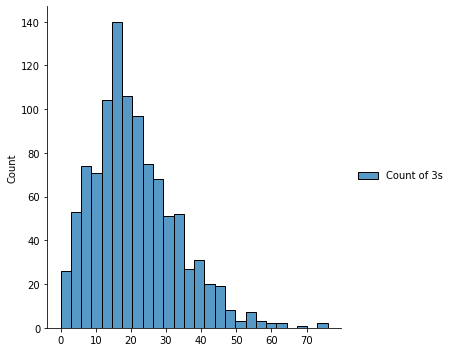

In [56]:
sns.displot(count3)

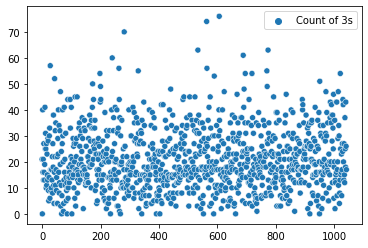

In [57]:
sns.scatterplot(data = count3)

In [91]:
# dontknows = pd.read_csv("dontknows.csv") --- pulled from later cell.

combined = pd.concat([count3, dontknows], axis=1)
combined.head()

,Count of 3s,Don'tKnows
0,21,10
1,0,89
2,40,4
3,16,19
4,21,18


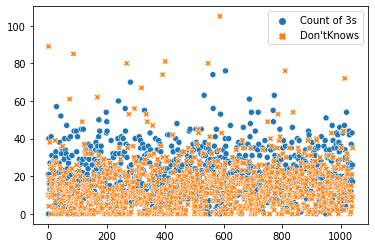

In [92]:
sns.scatterplot(data = combined)

Looking at this scatterplot, there doesn't appear to be much correlation. We see quite a few outliers as well above the 40 mark. The number of outliers above 40 might seem high, but the normally distributed displot for 3s assures it's not enough to cause concern. It's possible those participants were either newer residents unfamiliar with the city, had mixed experiences with the city and its services, or were somehow else 'out of touch' with city services.

To be sure, due to the high number of data points, I figured a k-means clustering would reveal if there's some clustering we're not seeing from the scatterplot.

I opted for k-means clustering thinking some important centerpoints could be hidden by the vast number of datapoints. Another reason is to try and confirm whether or not the outliers are significant. 

In [80]:
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


pipe = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=50)),    
])


onefive_formed = pipe.fit_transform(onefive_data)


In [82]:
pipe1 = Pipeline([
    ('fillna',SimpleImputer(strategy='constant',fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=1,random_state=50)),    
])

formed3 = pipe1.fit_transform(count3)

In [72]:
## Taken from in-class notebook by Chris Teplovs. 

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

def kclusters(formed):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(formed) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 42 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=50)
        cluster_labels = clusterer.fit_predict(formed)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(formed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(formed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(formed[:, 0], formed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5915000303344082


IndexError: index 1 is out of bounds for axis 1 with size 1

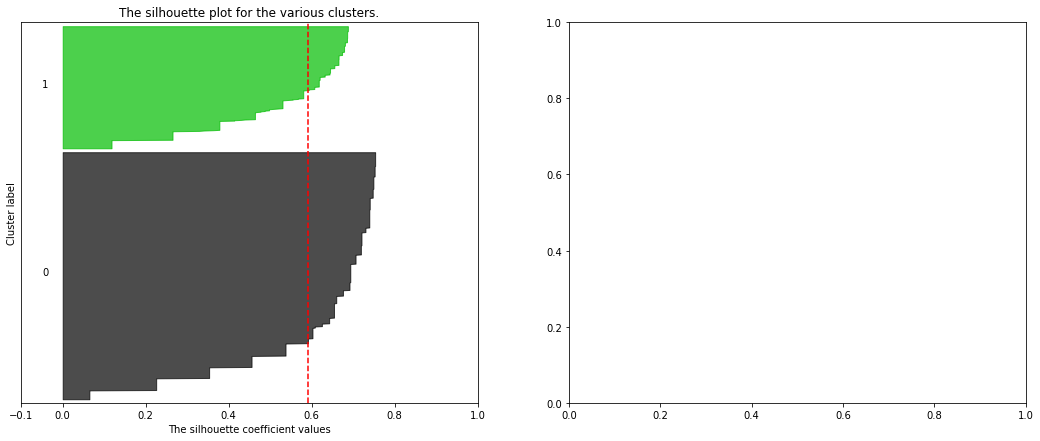

In [83]:
kclusters(formed3)

Using k-clustering for the number of 3s, we can't infer much. Let's see how the clusters look with all 1-5 questions. 

For n_clusters = 2 The average silhouette_score is : 0.37994726855996713
For n_clusters = 3 The average silhouette_score is : 0.41239686475278714
For n_clusters = 4 The average silhouette_score is : 0.3246101759233897
For n_clusters = 5 The average silhouette_score is : 0.32846378080613836
For n_clusters = 6 The average silhouette_score is : 0.33240100086607166


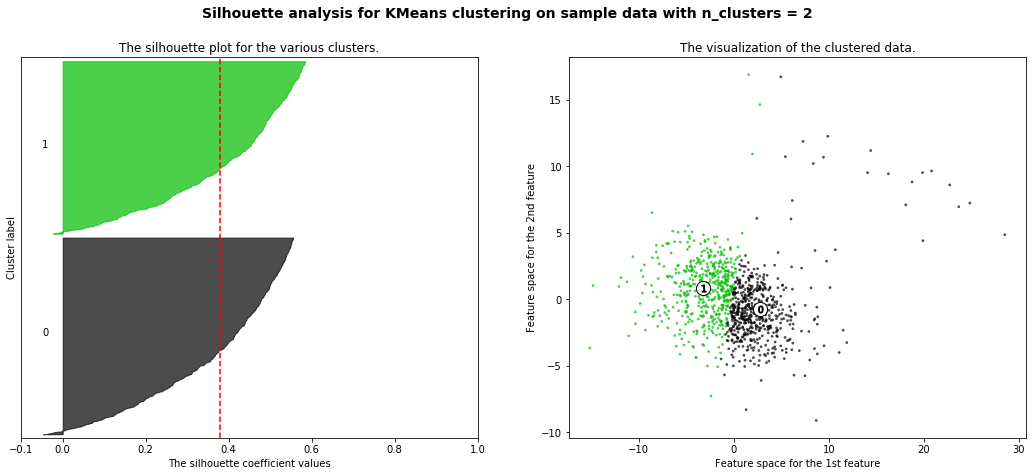

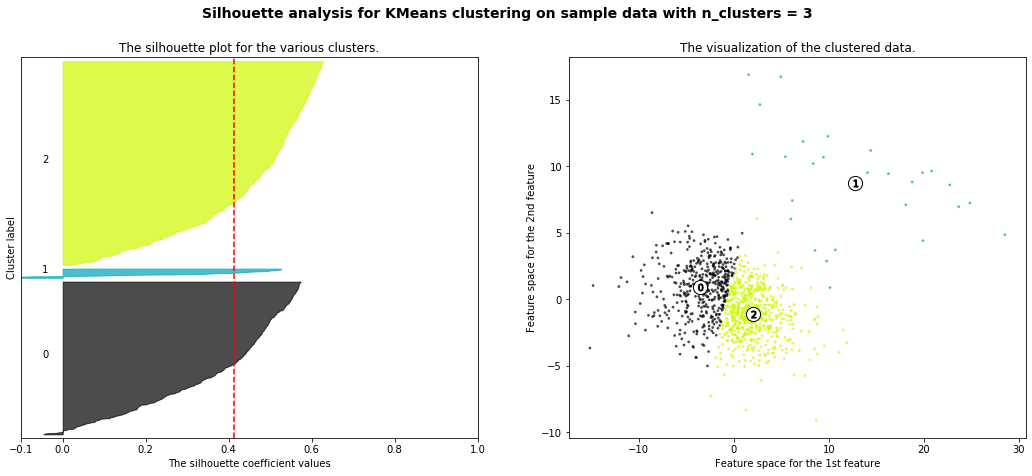

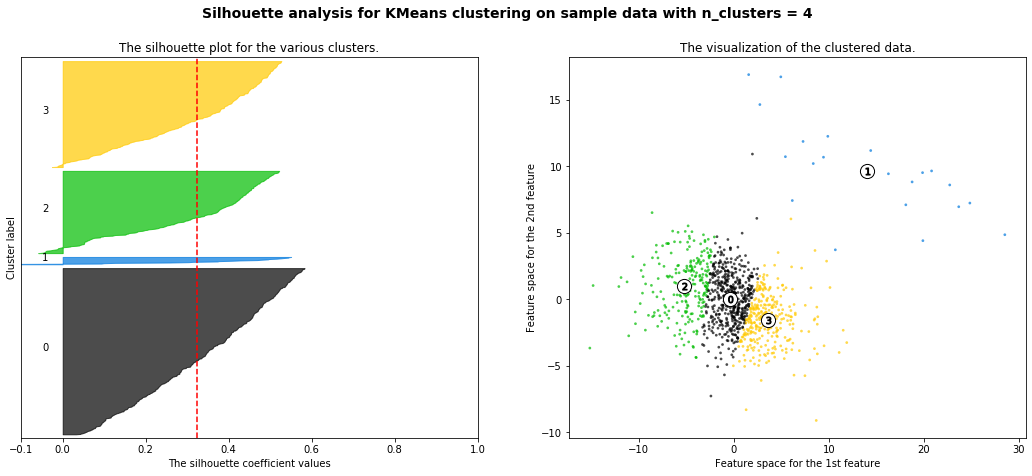

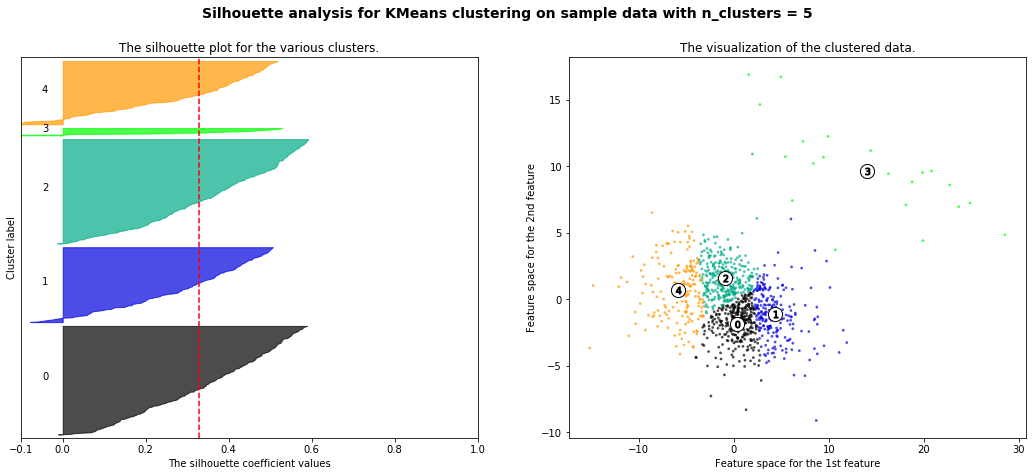

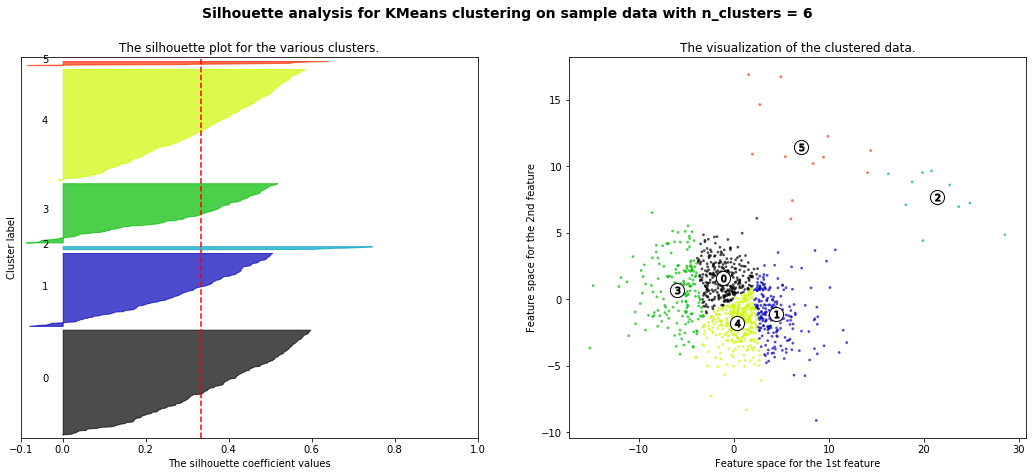

In [85]:
kclusters(onefive_formed)

The best silhouette scores come with 2 and 3 clusters. We can see the major clusters are evenly split in both, and the 3 clusters show the outliers as its own cluster. The silhouette 
plot shows it's not a good output with the sharp outlier cluster. 

In [87]:
dontknows = pd.read_csv("dontknows.csv")
dontknows.head()

,Don'tKnows
0,10
1,89
2,4
3,19
4,18


dontknows was imported the same way as count3. Counts of "9" (equivalent to "Don't Know" response) were taken from the csv file, each row representing a completed survey. 
The csv is then imported in Pandas. 

In [88]:
dontknows.describe()

,Don'tKnows
count,1042.000000
mean,14.604607
std,12.291805
min,0.000000
25%,6.000000
50%,13.000000
75%,20.000000
max,105.000000


We can see again we have a high standard deviation, with an average of almost 15 "Don't Know" responses per participant. We can also see one participant answered almost every question
with "Don't Know". This outlier is likely one of the newer residents mentioned earlier. 

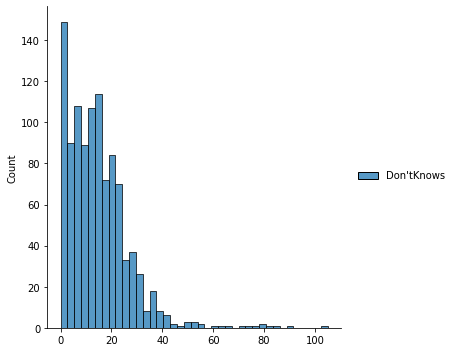

In [89]:
sns.displot(dontknows)

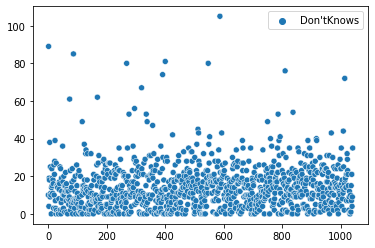

In [90]:
sns.scatterplot(data = dontknows)

One promising sign is the distribution plot is skewed right, meaning most participants did not answer with many "Don't Know" answers. The scatter plot shows a similar
story of most participants answering "Don't Know" at most about 20 times. 

Clustering shouldn't be necessary for the "Don't Know" responses. 

The greatest limitations to this project were, as previously mentioned, the large number of possible possibilities to analyze. The second was the dataset from
the U.S. Census Bureau was a completely different format than the Neighbor Survey. The data in that survey was not data points like in the Neighbor Survey, but
a list of averages. As a result of this format determining "Neutral", "Somewhat Important", and "Don't Know" responses was nearly impossible. 

The next priority on the comprehensive list provided was to find patterns amongst minority demographics. This again could be very open ended, and fears of fewer
responses from minority groups could lead to inaccurate or incomplete analysis. Future work could involve dividing the different minority groups into separte 
datasets to analyze patterns amongst the varied 1-5 responses. 